In [9]:
import pandas as pd
import matplotlib as plt
from soccerplots.radar_chart import Radar

In [10]:
#read chelsea dataset
df = pd.read_csv(r"C:\Users\Jonny\league.csv")
df
#shows first instances

,Team,Games Played,Goal Difference,xG,xGA,Net xG,xG Points,Points
0,Man City,22,41,47.2,13.7,33.5,62,56
1,Liverpool,21,37,54.5,19.5,35.0,51,45
2,Chelsea,22,28,40.9,21.7,19.2,44,43
3,West Ham,22,11,35.7,28.6,7.1,40,37
4,Man United,20,3,28.8,27.5,1.3,36,32
5,Arsenal,20,8,26.6,27.7,-1.1,35,35
6,Brighton,20,0,26.5,23.0,3.5,29,28
7,Brentford,21,-9,27.0,25.5,1.5,29,23
8,Wolves,20,2,22.0,24.0,-2.0,26,31
9,Southampton,21,-8,27.3,31.5,-4.2,25,24


In [11]:
#comparison
df= df[ (df['Team']=='Everton')|(df['Team']=='Burnley')].reset_index()
df

,index,Team,Games Played,Goal Difference,xG,xGA,Net xG,xG Points,Points
0,12,Everton,19,-10,23.7,30.0,-6.3,23,19
1,17,Burnley,17,-11,17.4,27.8,-10.4,12,11


In [12]:
df = df.drop(['index'],axis=1)
df

,Team,Games Played,Goal Difference,xG,xGA,Net xG,xG Points,Points
0,Everton,19,-10,23.7,30.0,-6.3,23,19
1,Burnley,17,-11,17.4,27.8,-10.4,12,11


In [13]:
#Use Paramaters
params= list(df.columns)
params=params[1:]
params

['Games Played',
 'Goal Difference',
 'xG',
 'xGA',
 'Net xG',
 'xG Points',
 'Points']

In [14]:
#Use lists with ranges for data
ranges = []
a_values = []
b_values = []
for x in params:
    a = min(df[params][x])
    a = a -(a*.25)

    b = max(df[params][x])
    b = b +(b*.25)
    ranges.append((a,b))

for x in range(len(df['Team'])):
    if df['Team'][x]=='Everton':
        a_values = df.iloc[x].values.tolist()
    if df['Team'][x]=='Burnley':
        b_values = df.iloc[x].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [15]:
#add title
title = dict(
    title_name= 'Everton',
    title_colour='blue',
    subtitle_name = 'Everton',
    subtitle_colour = 'blue',
    title_name_2= 'Burnley',
    title_colour_2='yellow',
    subtitle_name_2 = 'Burnley',
    subtitle_colour_2 = 'yellow',
    title_fontsize = 18,
    subtitle_fontsize =15
)
endnote = 'Jonathan Crawford'

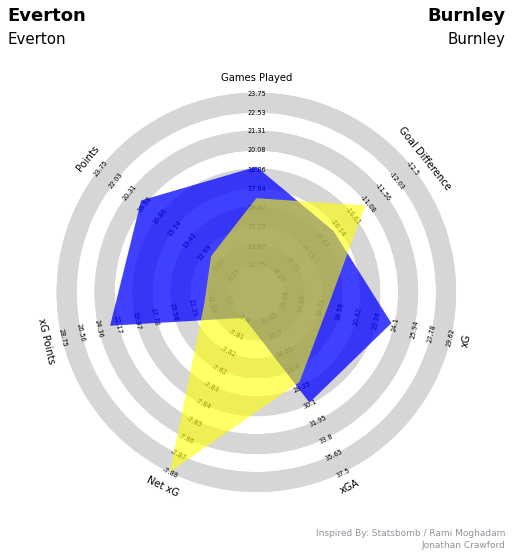

In [16]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                    radar_color=['blue','yellow'],
                    alphas=[.75,.6],title=title,endnote=endnote,
                    compare=True)